# Dependencies

In [67]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Load

In [68]:
import data_factory

factory = data_factory.DataFactory()
dataframes = factory.load_df(
    'data_set/raw_data.csv', 'data_set/transformed_data.csv')


In [69]:
df_r = dataframes[0]
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [70]:
df_t = dataframes[1]
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


# Data Cleaning

In [71]:
import data_transformer

dt = data_transformer.Transformer(df_t, df_r)
aggregated_data = dt.clean()

aggregated_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      210 non-null    object 
 1   Country           210 non-null    object 
 2   HDI               210 non-null    float64
 3   Total Cases       210 non-null    float64
 4   Total Deaths      210 non-null    float64
 5   Stringency Index  210 non-null    float64
 6   Population        210 non-null    float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


# Countries with Highest Cases

In [72]:
import visualization
vis = visualization.Visualize()

vis.plotly_bar(df_r, 'location',
               'total_cases', "Countries with Highest Covid Cases")


# Countries with Highest Deaths

In [73]:
vis.plotly_bar(df_r,  'location', 'total_deaths',
               "Countries with Highest Deaths")


# Total Cases to Deaths

In [89]:
import data_expansion

ent = data_expansion.Expansion()

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)

data = ent.add_entropy(data, ['GDP Before Covid', 'GDP During Covid'], 10)

vis.go_bar(data, [{'x': "Country", 'y': "GDP Before Covid",
           'name': 'GDP Per Capita Before Covid-19', 'color': 'indianred'},
                  {'x': "Country", 'y': "GDP During Covid",
                   'name': 'GDP Per Capita During Covid-19', 'color': 'lightsalmon'}])


# Percentage of Total Cases and Deaths

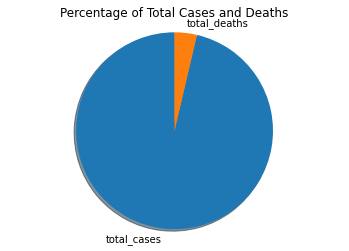

In [87]:
# Percentage of Total Cases and Deaths
data
vis.px_pie(data, ["total_cases", "total_deaths"],
           'Percentage of Total Cases and Deaths')

# Death Rate

In [76]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.6144212045653767


In [77]:
data = df_r[df_r['total_cases'] > 5000]

vis.plotly_bar(data, 'location', 'total_cases',
               'Stringency Index during Covid-19')

# HDI

In [78]:
data = df_r[df_r['total_cases'] > 100000]
vis.plotly_bar(data, 'location', 'total_cases',
               'Human Development Index during Covid-19')

# Export Analysis

In [79]:
factory.save_csv('outputs')
factory.save_hdf('outputs')
